The source of the algorithm is inside several .py files. Accessing through bovw's run method we can configure the execution in order to iterate over the desired parameters. If a parameter has exactly one value, only that will be use. If it has tree, a np.linspace will be created with them.

In [1]:
from bovw import run

Default method to run the experiments

In [2]:
from argparse import Namespace
import numpy as np
from matplotlib import pyplot as plt

def run_experiment(method=('sift',), n_features=(300,), step_size=(16,), n_clusters=(128,), n_neighbors=(5,), distance=(
'euclidean',)):
    args = Namespace(train_path='../data/MIT_split/train',
                     test_path='../data/MIT_split/test',
                     method=method,
                     n_features=n_features,
                     step_size=step_size,
                     n_clusters=n_clusters,
                     n_neighbors=n_neighbors,
                     distance=distance)
    return run(args)


Test different amounts of local features over SIFT. If we don't have enough features the results will be bad but if we have too many the computational time will increase too much. We should find a compromise between both.

method: sift, n_features: 100, step_size: 16
extract train descriptors: 18.453092s
extract test descriptors: 7.477606s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 4.150681s
test: 0.613794s


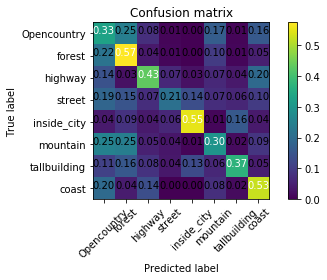

method: sift, n_features: 200, step_size: 16
extract train descriptors: 21.505126s
extract test descriptors: 12.345036s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 6.495932s
test: 0.785737s


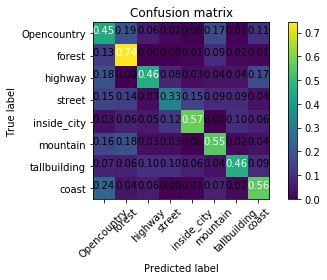

method: sift, n_features: 300, step_size: 16
extract train descriptors: 27.522081s
extract test descriptors: 15.024206s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.564241s
test: 0.878719s


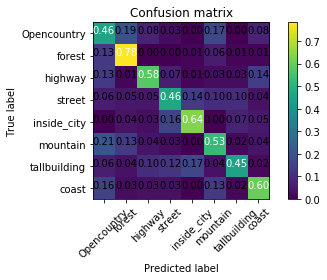

method: sift, n_features: 400, step_size: 16
extract train descriptors: 30.385422s
extract test descriptors: 15.072190s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 10.506648s
test: 0.964680s


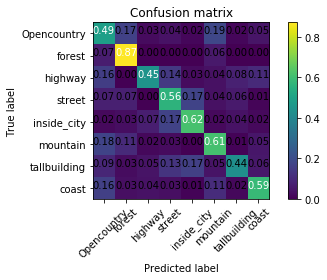

method: sift, n_features: 500, step_size: 16
extract train descriptors: 31.149032s
extract test descriptors: 13.218894s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.933139s
test: 0.997669s


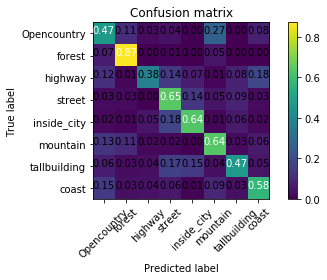

method: sift, n_features: 600, step_size: 16
extract train descriptors: 27.963052s
extract test descriptors: 13.221767s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 10.882497s
test: 1.034669s


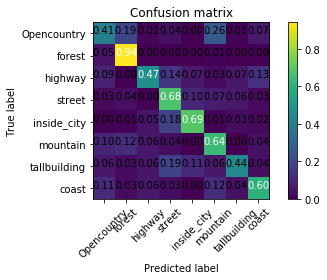

method: sift, n_features: 700, step_size: 16
extract train descriptors: 30.604218s
extract test descriptors: 13.939521s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 9.980817s
test: 1.076643s


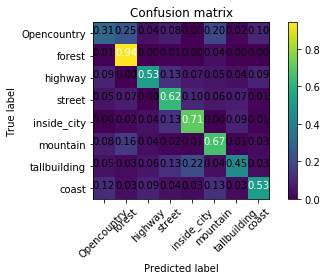

method: sift, n_features: 800, step_size: 16
extract train descriptors: 31.154057s
extract test descriptors: 14.991299s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 10.623599s
test: 1.120629s


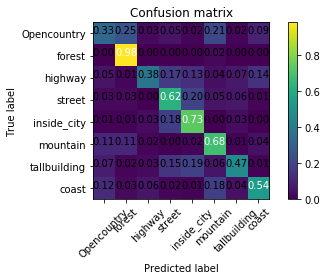

method: sift, n_features: 900, step_size: 16
extract train descriptors: 31.279984s
extract test descriptors: 15.160146s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 12.473019s
test: 1.158617s


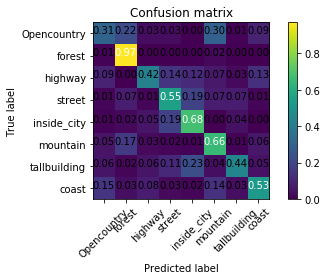

method: sift, n_features: 1000, step_size: 16
extract train descriptors: 30.627181s
extract test descriptors: 15.643003s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 11.149412s
test: 1.124640s


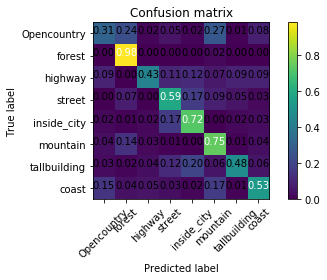

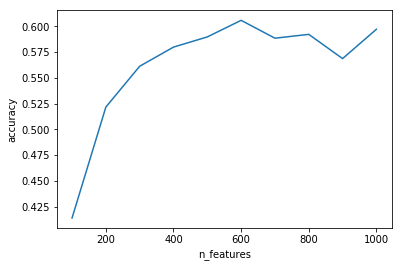

In [3]:
results = run_experiment(n_features=[100, 1000, 10])
plt.plot(results['n_features'], results['accuracy'])
plt.xlabel('n_features')
plt.ylabel('accuracy')
plt.show()

The accuracy from 500 features onwards is more or less constant. So a values between 500 and 600 should work properly.

SIFT vs DenseSIFT.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 22.980633s
extract test descriptors: 13.689732s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.539248s
test: 0.857725s


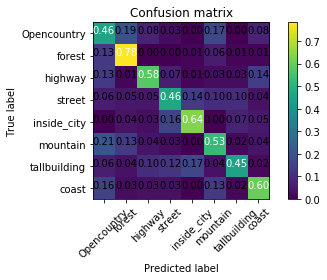

method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 258.862105s
extract test descriptors: 112.021134s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 7.830493s
test: 0.851727s


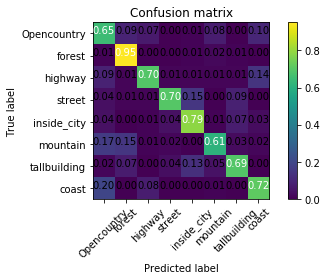

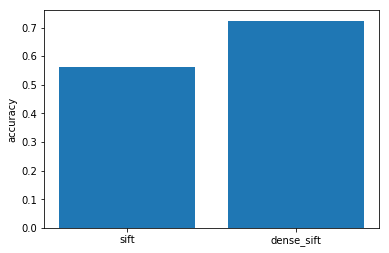

In [4]:
results = run_experiment(method=['sift', 'dense_sift'])
x = np.arange(2)
plt.bar(x, results['accuracy'])
plt.xticks(x, results['method'])
plt.ylabel('accuracy')
plt.show()

In the graph above, we can crearly observer how dense_sift outperforms sift.

Test different amounts of codebook sizes k.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 22.288971s
extract test descriptors: 12.959913s
n_clusters: 80, n_neighbors: 5, distance: euclidean
train: 4.934405s
test: 0.770754s


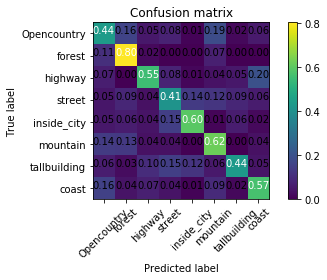

n_clusters: 93, n_neighbors: 5, distance: euclidean
train: 6.155044s
test: 0.812740s


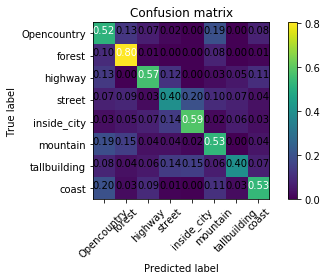

n_clusters: 106, n_neighbors: 5, distance: euclidean
train: 6.286987s
test: 0.832734s


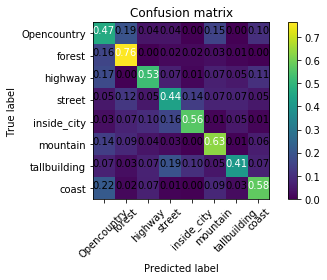

n_clusters: 120, n_neighbors: 5, distance: euclidean
train: 7.393633s
test: 0.871721s


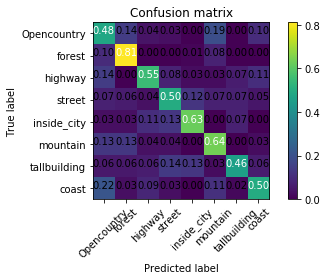

n_clusters: 133, n_neighbors: 5, distance: euclidean
train: 8.741202s
test: 0.877719s


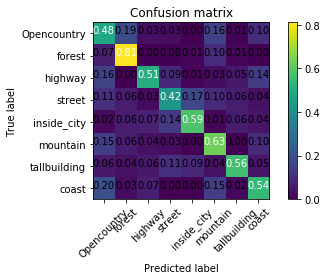

n_clusters: 146, n_neighbors: 5, distance: euclidean
train: 9.252038s
test: 0.900744s


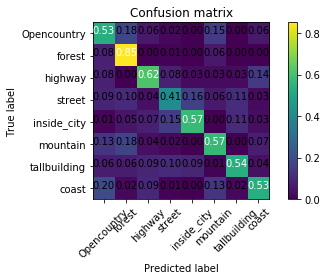

n_clusters: 160, n_neighbors: 5, distance: euclidean
train: 9.802861s
test: 0.913696s


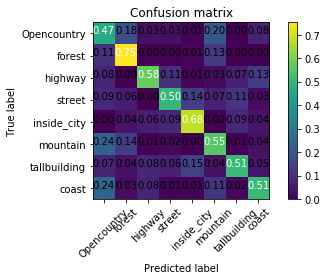

n_clusters: 173, n_neighbors: 5, distance: euclidean
train: 11.289386s
test: 0.968690s


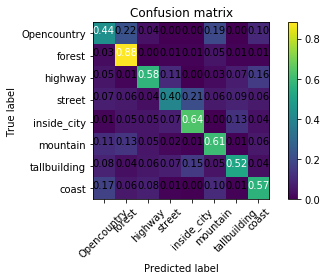

n_clusters: 186, n_neighbors: 5, distance: euclidean
train: 11.211422s
test: 1.026659s


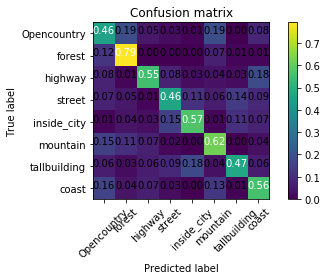

n_clusters: 200, n_neighbors: 5, distance: euclidean
train: 11.735253s
test: 1.003668s


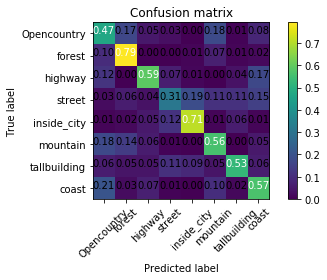

n_clusters: 213, n_neighbors: 5, distance: euclidean
train: 12.402041s
test: 1.144662s


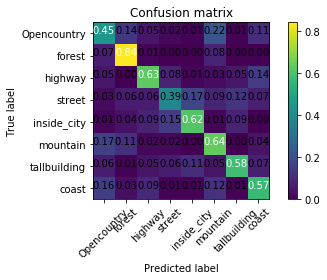

n_clusters: 226, n_neighbors: 5, distance: euclidean
train: 13.823586s
test: 1.143623s


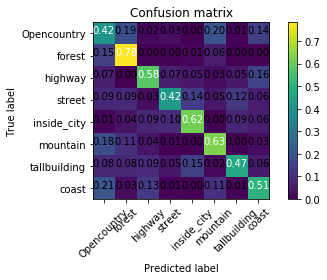

n_clusters: 240, n_neighbors: 5, distance: euclidean
train: 13.761587s
test: 1.179029s


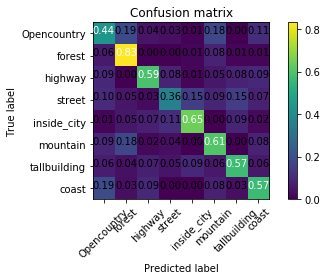

n_clusters: 253, n_neighbors: 5, distance: euclidean
train: 14.487373s
test: 1.229663s


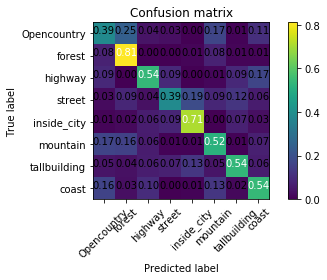

n_clusters: 266, n_neighbors: 5, distance: euclidean
train: 16.171823s
test: 1.222726s


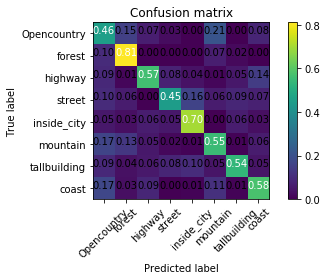

n_clusters: 280, n_neighbors: 5, distance: euclidean
train: 17.248477s
test: 1.267634s


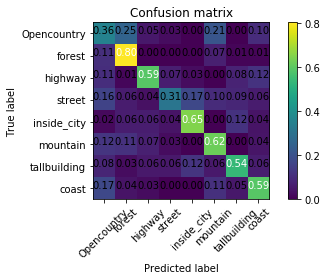

n_clusters: 293, n_neighbors: 5, distance: euclidean
train: 18.232175s
test: 1.294586s


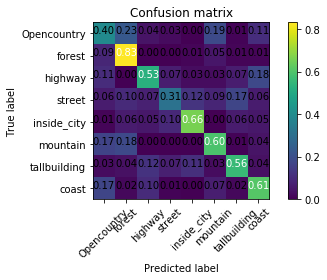

n_clusters: 306, n_neighbors: 5, distance: euclidean
train: 18.407104s
test: 1.303583s


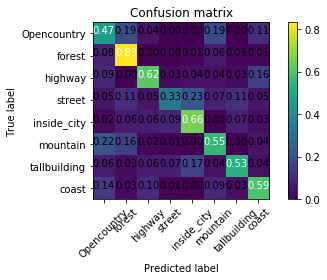

n_clusters: 320, n_neighbors: 5, distance: euclidean
train: 19.368811s
test: 1.322565s


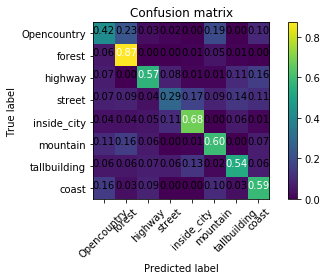

n_clusters: 333, n_neighbors: 5, distance: euclidean
train: 20.411477s
test: 1.372549s


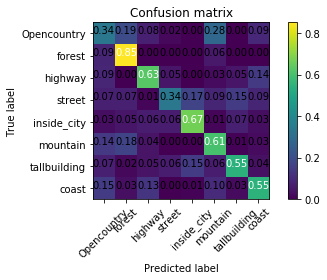

n_clusters: 346, n_neighbors: 5, distance: euclidean
train: 21.169236s
test: 1.385542s


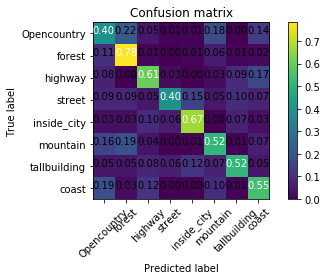

n_clusters: 360, n_neighbors: 5, distance: euclidean
train: 22.018949s
test: 1.404550s


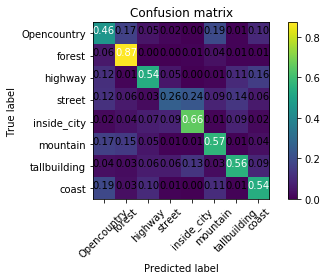

n_clusters: 373, n_neighbors: 5, distance: euclidean
train: 22.878682s
test: 1.437529s


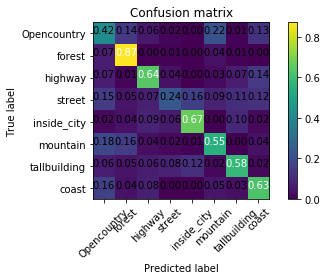

n_clusters: 386, n_neighbors: 5, distance: euclidean
train: 23.446493s
test: 1.425532s


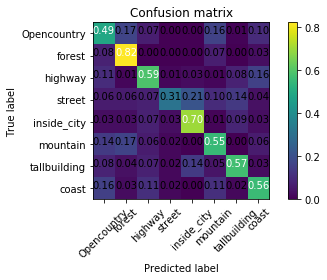

n_clusters: 400, n_neighbors: 5, distance: euclidean
train: 24.492142s
test: 1.546592s


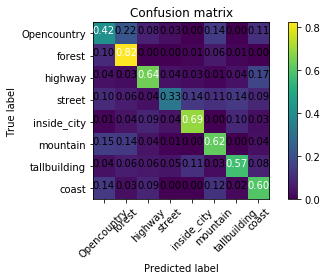

method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 256.558844s
extract test descriptors: 111.311361s
n_clusters: 80, n_neighbors: 5, distance: euclidean
train: 5.052382s
test: 0.768768s


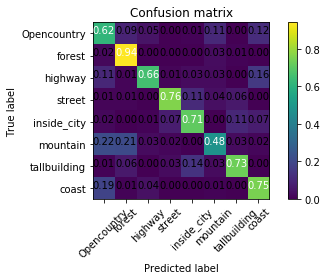

n_clusters: 93, n_neighbors: 5, distance: euclidean
train: 5.584194s
test: 0.813740s


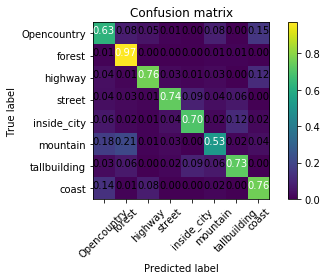

n_clusters: 106, n_neighbors: 5, distance: euclidean
train: 6.180021s
test: 0.812740s


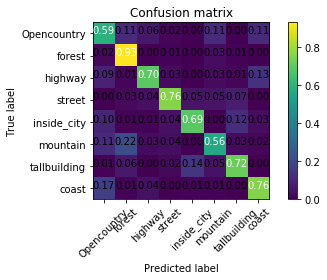

n_clusters: 120, n_neighbors: 5, distance: euclidean
train: 6.901800s
test: 0.853717s


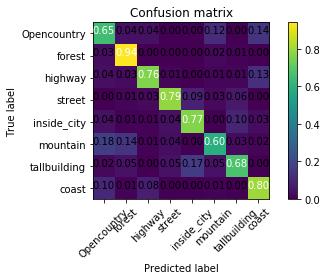

n_clusters: 133, n_neighbors: 5, distance: euclidean
train: 7.867493s
test: 0.865710s


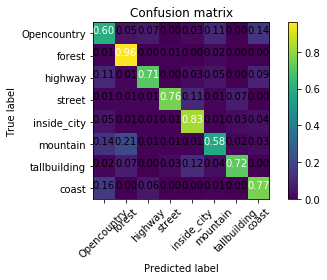

n_clusters: 146, n_neighbors: 5, distance: euclidean
train: 8.376316s
test: 0.887716s


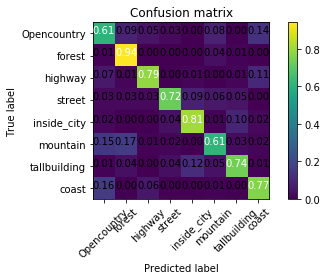

n_clusters: 160, n_neighbors: 5, distance: euclidean
train: 8.806164s
test: 0.917706s


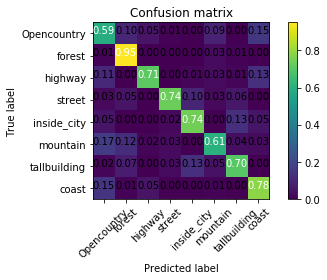

n_clusters: 173, n_neighbors: 5, distance: euclidean
train: 9.399003s
test: 0.960681s


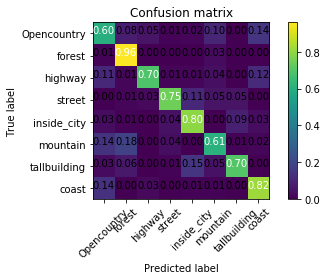

n_clusters: 186, n_neighbors: 5, distance: euclidean
train: 11.644272s
test: 0.981674s


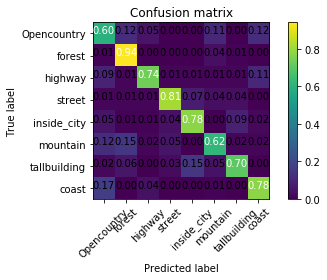

n_clusters: 200, n_neighbors: 5, distance: euclidean
train: 12.133126s
test: 1.006660s


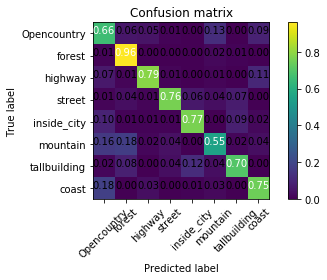

n_clusters: 213, n_neighbors: 5, distance: euclidean
train: 11.116452s
test: 1.123729s


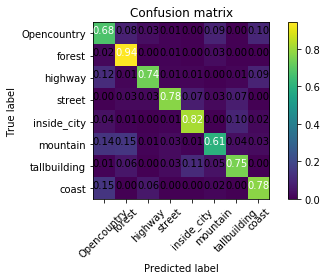

n_clusters: 226, n_neighbors: 5, distance: euclidean
train: 13.342728s
test: 1.136664s


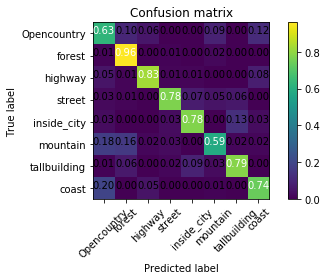

n_clusters: 240, n_neighbors: 5, distance: euclidean
train: 14.403372s
test: 1.171843s


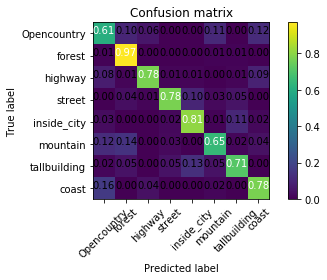

n_clusters: 253, n_neighbors: 5, distance: euclidean
train: 14.830237s
test: 1.222610s


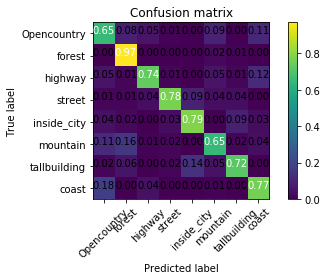

n_clusters: 266, n_neighbors: 5, distance: euclidean
train: 15.770952s
test: 1.231656s


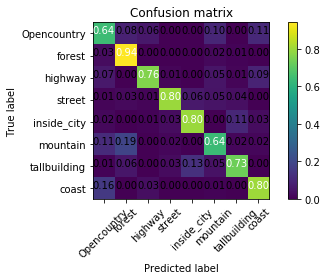

n_clusters: 280, n_neighbors: 5, distance: euclidean
train: 16.718630s
test: 1.258710s


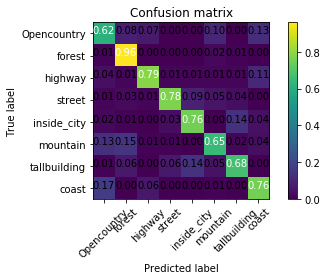

n_clusters: 293, n_neighbors: 5, distance: euclidean
train: 17.516380s
test: 1.271701s


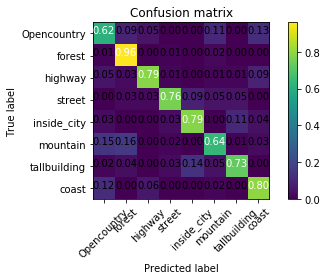

n_clusters: 306, n_neighbors: 5, distance: euclidean
train: 17.997239s
test: 1.293643s


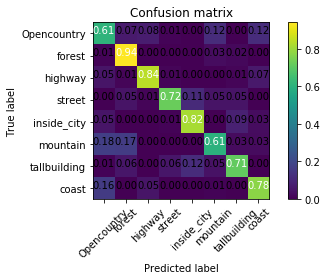

n_clusters: 320, n_neighbors: 5, distance: euclidean
train: 18.684018s
test: 1.327575s


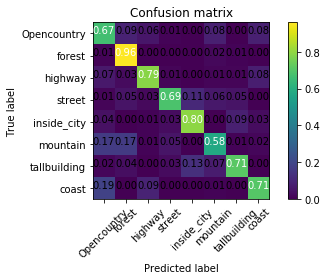

n_clusters: 333, n_neighbors: 5, distance: euclidean
train: 19.605723s
test: 1.351551s


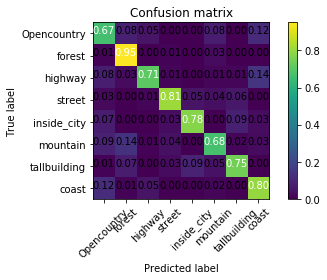

n_clusters: 346, n_neighbors: 5, distance: euclidean
train: 20.567415s
test: 1.426533s


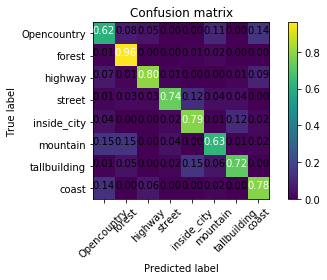

n_clusters: 360, n_neighbors: 5, distance: euclidean
train: 21.523109s
test: 1.414547s


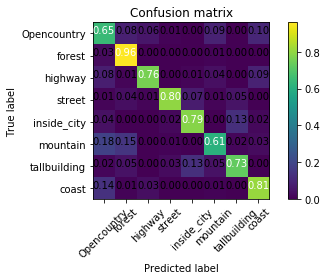

n_clusters: 373, n_neighbors: 5, distance: euclidean
train: 22.119918s
test: 1.434528s


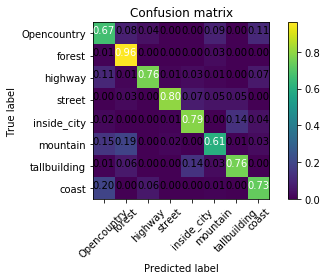

n_clusters: 386, n_neighbors: 5, distance: euclidean
train: 22.856682s
test: 1.438540s


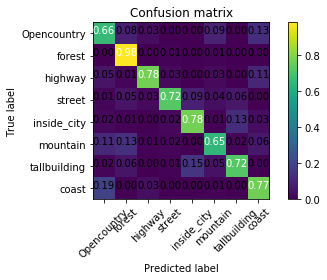

n_clusters: 400, n_neighbors: 5, distance: euclidean
train: 23.858350s
test: 1.571765s


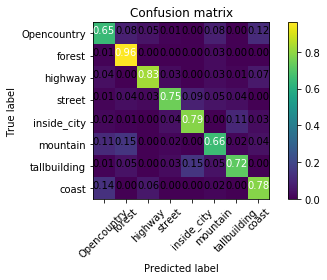

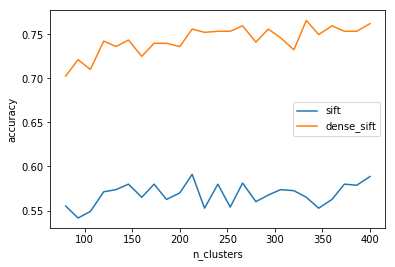

In [5]:
results = run_experiment(method=['sift', 'dense_sift'], n_clusters=[80, 400, 25])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_clusters'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_clusters'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_clusters')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Test different values of k for the k-nn classifier.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 22.739831s
extract test descriptors: 13.771728s
n_clusters: 128, n_neighbors: 3, distance: euclidean
train: 8.377298s
test: 0.852727s


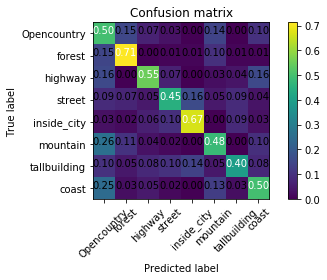

n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.400323s
test: 0.859733s


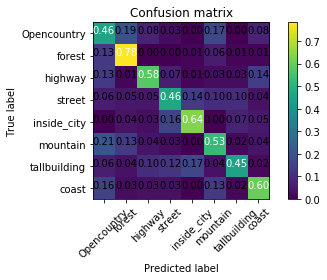

n_clusters: 128, n_neighbors: 7, distance: euclidean
train: 8.395312s
test: 0.864712s


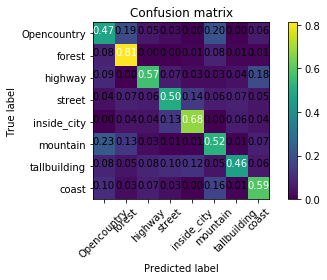

n_clusters: 128, n_neighbors: 9, distance: euclidean
train: 8.607257s
test: 0.859712s


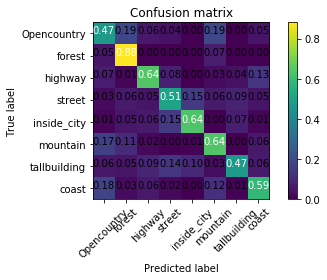

n_clusters: 128, n_neighbors: 11, distance: euclidean
train: 8.488282s
test: 0.858725s


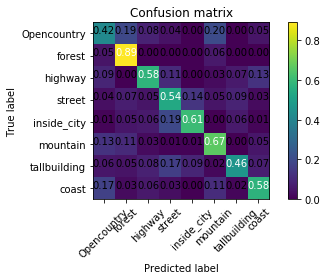

n_clusters: 128, n_neighbors: 13, distance: euclidean
train: 8.448295s
test: 0.858726s


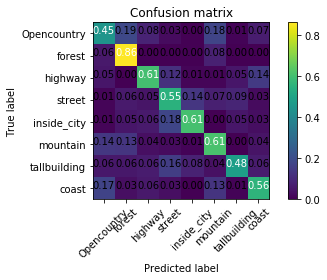

n_clusters: 128, n_neighbors: 15, distance: euclidean
train: 8.412306s
test: 0.860725s


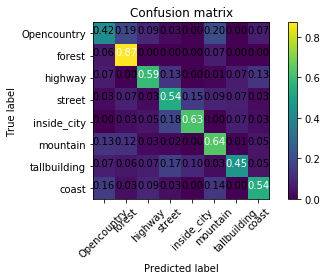

n_clusters: 128, n_neighbors: 17, distance: euclidean
train: 8.496280s
test: 0.857725s


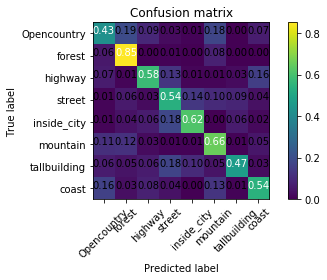

n_clusters: 128, n_neighbors: 19, distance: euclidean
train: 8.502278s
test: 0.864723s


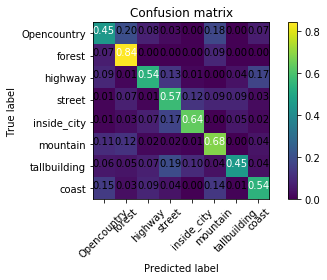

n_clusters: 128, n_neighbors: 21, distance: euclidean
train: 8.481284s
test: 0.862724s


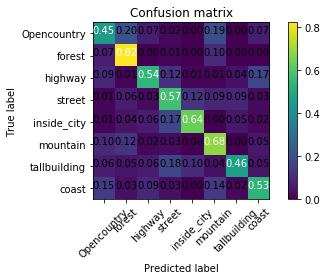

method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 258.230321s
extract test descriptors: 111.165408s
n_clusters: 128, n_neighbors: 3, distance: euclidean
train: 8.744200s
test: 0.857726s


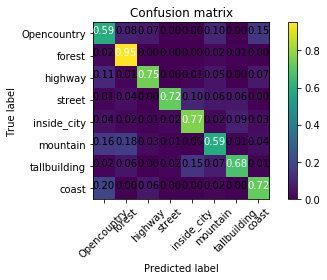

n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.651230s
test: 0.850728s


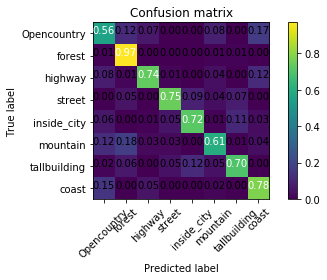

n_clusters: 128, n_neighbors: 7, distance: euclidean
train: 8.593261s
test: 0.853715s


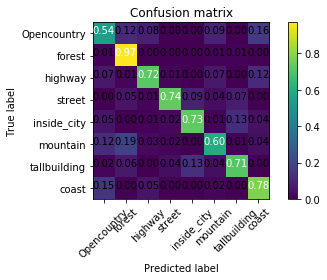

n_clusters: 128, n_neighbors: 9, distance: euclidean
train: 8.621240s
test: 0.873720s


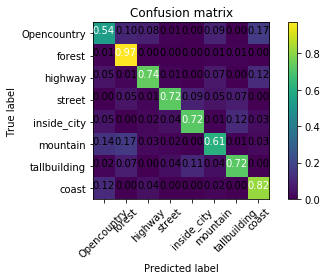

n_clusters: 128, n_neighbors: 11, distance: euclidean
train: 8.605244s
test: 0.850747s


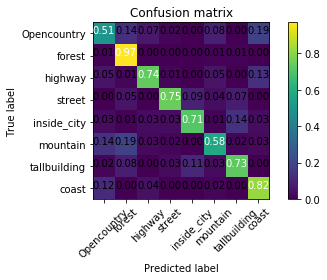

n_clusters: 128, n_neighbors: 13, distance: euclidean
train: 8.632230s
test: 0.857726s


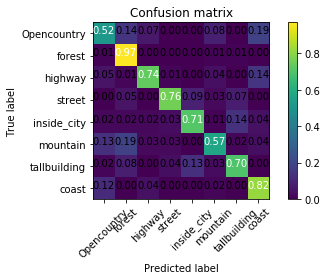

n_clusters: 128, n_neighbors: 15, distance: euclidean
train: 8.649218s
test: 0.858726s


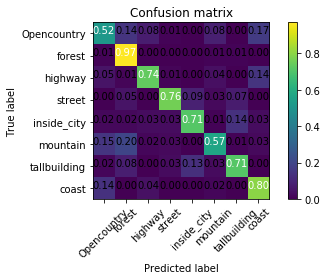

n_clusters: 128, n_neighbors: 17, distance: euclidean
train: 8.647232s
test: 0.859713s


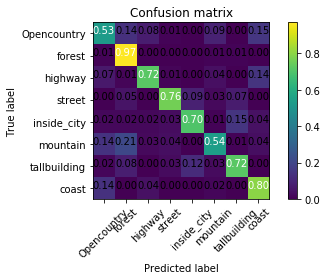

n_clusters: 128, n_neighbors: 19, distance: euclidean
train: 8.615253s
test: 0.856718s


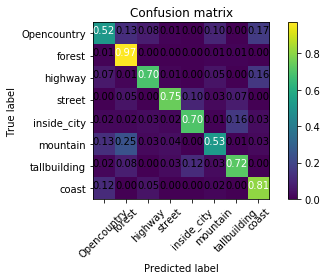

n_clusters: 128, n_neighbors: 21, distance: euclidean
train: 8.642220s
test: 0.854727s


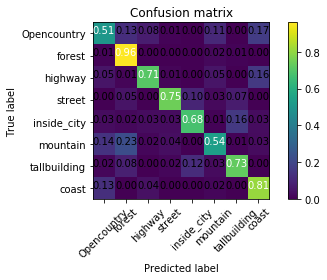

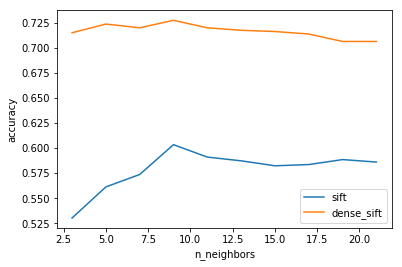

In [6]:
results = run_experiment(method=['sift', 'dense_sift'], n_neighbors=[3, 21, 10])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_neighbors'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_neighbors'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

The number of neighbors must be at least 10 to provide good enough results.

Test different distances for the k-nn classifier.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 22.601790s
extract test descriptors: 13.954547s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.527267s
test: 0.881706s


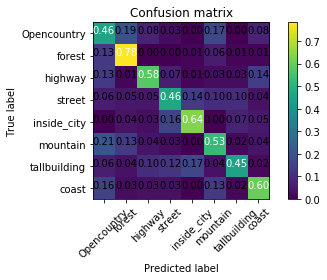

n_clusters: 128, n_neighbors: 5, distance: manhattan
train: 8.521260s
test: 0.879718s


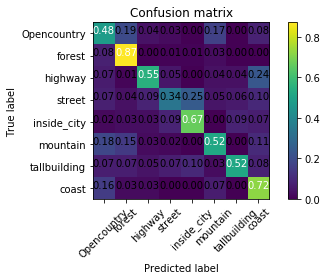

n_clusters: 128, n_neighbors: 5, distance: chebyshev
train: 8.496278s
test: 0.870712s


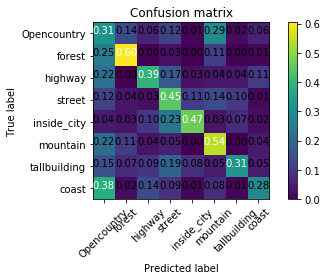

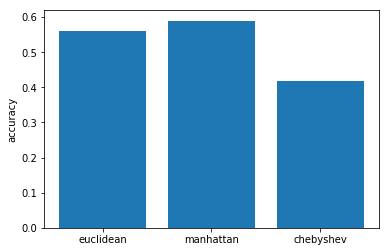

In [7]:
results = run_experiment(distance=['euclidean', 'manhattan', 'chebyshev'])
x = np.arange(3)
plt.bar(x, results['accuracy'])
plt.xticks(x, results['distance'])
plt.ylabel('accuracy')
plt.show()

The euclidean distance is clearly the best performing one.